In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [7]:
# example dataset
data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3]).reshape(-1, 1)
data.shape

(10, 1)

In [ ]:
bandwidth : float or {"scott", "silverman"}, default=1.0
The bandwidth of the kernel. If bandwidth is a float, it defines the
bandwidth of the kernel. If bandwidth is a string, one of the estimation
methods is implemented.

algorithm : {'kd_tree', 'ball_tree', 'auto'}, default='auto'
    The tree algorithm to use.

kernel : {'gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear',                  'cosine'}, default='gaussian'

In [39]:
# Perforn kernel density estimation
kde = KernelDensity(bandwidth=0.3, algorithm='auto', kernel="gaussian", metric="euclidean")

In [40]:
# fit data to kde
kde.fit(data)

KernelDensity(bandwidth=0.3)

In [41]:
# Generate points for the density estimation plot
x_vals = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
log_density = kde.score_samples(x_vals)  # Compute the log-density values

In [42]:
# Generate points for the density estimation plot
x_vals = np.linspace(min(data), max(data), 1000).reshape(-1, 1)

In [43]:
log_density = kde.score_samples(x_vals)

In [44]:
log_density

array([-1.57360582, -1.56812362, -1.56268214, -1.55728096, -1.55191967,
       -1.54659787, -1.54131513, -1.53607105, -1.53086523, -1.52569726,
       -1.52056674, -1.51547329, -1.51041649, -1.50539596, -1.5004113 ,
       -1.49546214, -1.49054808, -1.48566874, -1.48082375, -1.47601273,
       -1.4712353 , -1.46649111, -1.46177978, -1.45710096, -1.45245428,
       -1.44783939, -1.44325594, -1.43870359, -1.43418199, -1.42969079,
       -1.42522968, -1.42079831, -1.41639637, -1.41202352, -1.40767945,
       -1.40336385, -1.3990764 , -1.39481681, -1.39058477, -1.38637999,
       -1.38220217, -1.37805103, -1.37392629, -1.36982768, -1.36575491,
       -1.36170772, -1.35768585, -1.35368904, -1.34971705, -1.34576961,
       -1.34184649, -1.33794745, -1.33407226, -1.33022069, -1.32639252,
       -1.32258752, -1.31880549, -1.31504622, -1.3113095 , -1.30759513,
       -1.30390293, -1.3002327 , -1.29658426, -1.29295744, -1.28935205,
       -1.28576793, -1.28220491, -1.27866284, -1.27514156, -1.27

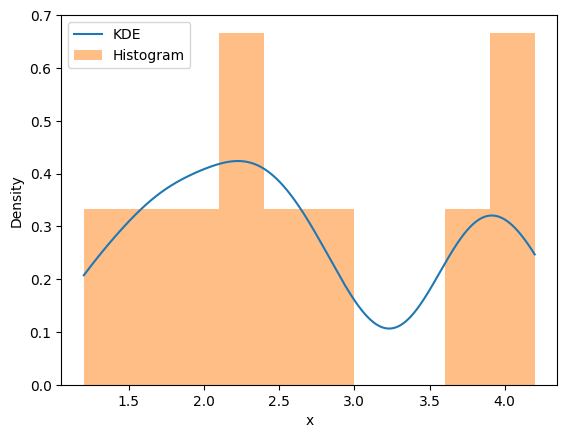

In [45]:
plt.plot(x_vals, np.exp(log_density), label="KDE")
plt.hist(data, bins=10, density=True, alpha=0.5, label="Histogram")
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [52]:
stats.gamma.name

'gamma'

In [53]:
stats.norm.name
test_stat, p_value = stats.kstest(data, cdf=stats.expon.name)
print(test_stat, p_value)

0.6988057880877978 2.0459656463466105e-05


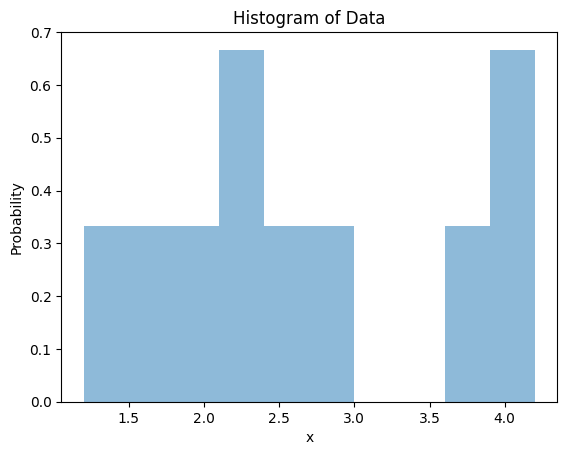

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example dataset
data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Step 1: Data Exploration
plt.hist(data, bins=10, density=True, alpha=0.5, label='Data')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Histogram of Data')
plt.show()

# Step 2: Statistical Tests
potential_distributions = [stats.norm, stats.expon, stats.gamma] #, stats.gamma



In [70]:
best_fit = None
best_params = None
best_aic = np.inf

for i, distribution in enumerate(potential_distributions):
    # Perform statistical test
    test_stat, p_value = stats.kstest(data, distribution.name)
    
    if p_value > 0.05:  # Assuming significance level of 0.05
        # Fit distribution to data
        params = distribution.fit(data)
        
        # Calculate AIC
        aic = -2 * distribution.logpdf(data, *params).sum() + 2 * len(params)
        ptint(aic)
        if aic < best_aic:
            best_fit = distribution
            best_params = params
            best_aic = aic

            # Step 3: Parameter Estimation and Model Comparison
            print(f"Best Fit: {best_fit.name}")
            print(f"Best Parameters: {best_params}")
            print(f"AIC: {best_aic}")

            # Step 4: Visualize the Best Fit Distribution
            x = np.linspace(min(data), max(data), 1000)
            y = best_fit.pdf(x, *best_params)
            
            plt.subplot(eval(f"12{i}"))
            plt.plot(x, y, label='Best Fit Distribution')
            plt.hist(data, bins=10, density=True, alpha=0.5, label='Data')
            plt.xlabel('x')
            plt.ylabel('Probability')
            plt.title('Best Fit Distribution')
            plt.legend()
            plt.show()

In [78]:
test_stat, p_value = stats.kstest(data, potential_distributions[2].name)
print(test_stat, p_value)    
# if p_value > 0.05:  # Assuming significance level of 0.05
    # Fit distribution to data
params = distribution.fit(data)

# Calculate AIC
aic = -2 * distribution.logpdf(data, *params).sum() + 2 * len(params)
print("aic", aic)
# if aic < best_aic:
best_fit = distribution
best_params = params
best_aic = aic

# Step 3: Parameter Estimation and Model Comparison
print(f"Best Fit: {best_fit.name}")
print(f"Best Parameters: {best_params}")
print(f"AIC: {best_aic}")

# Step 4: Visualize the Best Fit Distribution
x = np.linspace(min(data), max(data), 1000)
y = best_fit.pdf(x, *best_params)

plt.subplot(eval(f"12{i}"))
plt.plot(x, y, label='Best Fit Distribution')
plt.hist(data, bins=10, density=True, alpha=0.5, label='Data')
plt.xlabel('x')
plt.ylabel('Probability')
plt.title('Best Fit Distribution')
plt.legend()

TypeError: _parse_args() missing 1 required positional argument: 'a'

In [74]:
stats.gamma.name

'gamma'

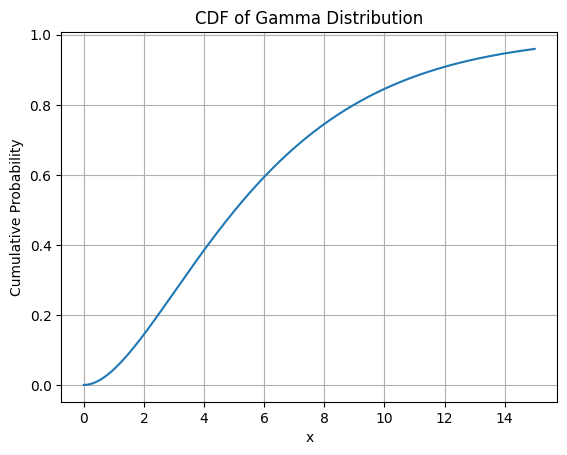

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example parameters for the gamma distribution
shape = 2  # shape parameter 'a'
scale = 3  # scale parameter 'scale'

# Generate random values from the gamma distribution
data = np.random.gamma(shape, scale, size=1000)

# Calculate the cumulative distribution function (CDF)
x = np.linspace(0, 15, 1000)
cdf = stats.gamma.cdf(x, shape, scale=scale)

# Plot the CDF
plt.plot(x, cdf)
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Gamma Distribution')
plt.grid(True)
plt.show()

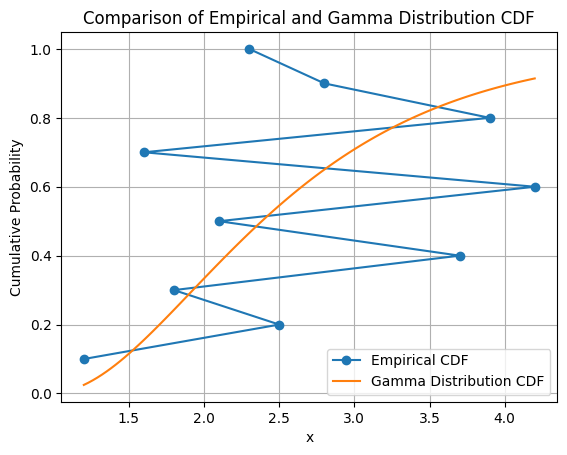

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example dataset
data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Fit the gamma distribution to the data
shape, loc, scale = stats.gamma.fit(data)

# Calculate the empirical CDF of the data
n = len(data)
ecdf = np.arange(1, n + 1) / n

# Calculate the CDF of the gamma distribution
x = np.linspace(min(data), max(data), 100)
cdf = stats.gamma.cdf(x, shape, loc=loc, scale=scale)

# Plot the empirical CDF and the CDF of the gamma distribution
plt.plot(data, ecdf, marker='o', linestyle='-', label='Empirical CDF')
plt.plot(x, cdf, label='Gamma Distribution CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of Empirical and Gamma Distribution CDF')
plt.legend()
plt.grid(True)
plt.show()

KS Statistic: 0.15438222016292036
P-value: 0.9425787295968298


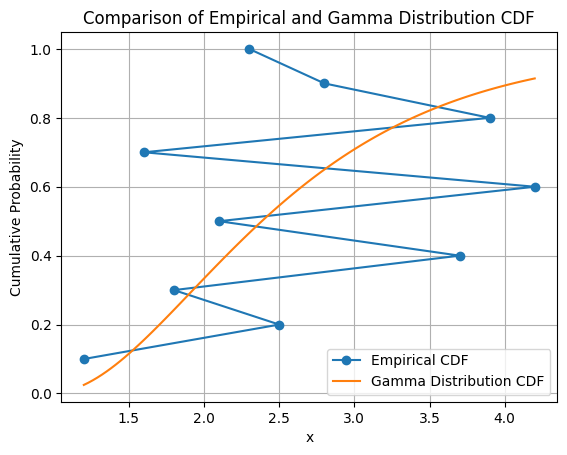

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example dataset
data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Fit the gamma distribution to the data
shape, loc, scale = stats.gamma.fit(data)

# Calculate the empirical CDF of the data
n = len(data)
ecdf = np.arange(1, n + 1) / n

# Calculate the CDF of the gamma distribution
x = np.linspace(min(data), max(data), 100)
cdf = stats.gamma.cdf(x, shape, loc=loc, scale=scale)

# Perform the Kolmogorov-Smirnov test
ks_stat, p_value = stats.kstest(data, 'gamma', args=(shape, loc, scale))

# Plot the empirical CDF, the CDF of the gamma distribution, and the KS test result
plt.plot(data, ecdf, marker='o', linestyle='-', label='Empirical CDF')
plt.plot(x, cdf, label='Gamma Distribution CDF')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('Comparison of Empirical and Gamma Distribution CDF')
plt.legend()
plt.grid(True)

# Print the KS test result
print(f"KS Statistic: {ks_stat}")
print(f"P-value: {p_value}")

plt.show()

KS Test Statistic: 0.8849303297782918
KS Test p-value: 8.140274660292592e-10


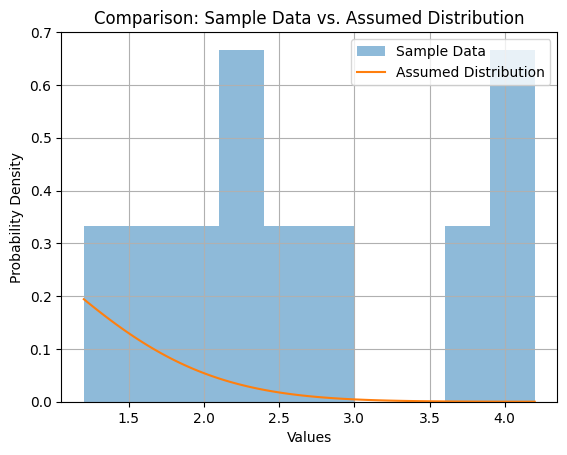

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Assumed distribution
assumed_distribution = stats.norm

# Plotting the histogram of the sample data
plt.hist(sample_data, bins=10, density=True, alpha=0.5, label='Sample Data')

# Comparing with the assumed distribution
x = np.linspace(min(sample_data), max(sample_data), 100)
y = assumed_distribution.pdf(x)
plt.plot(x, y, label='Assumed Distribution')

# Perform the KS test
ks_stat, p_value_ks = stats.kstest(sample_data, 'norm')

# Print the test results
print(f"KS Test Statistic: {ks_stat}")
print(f"KS Test p-value: {p_value_ks}")

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Comparison: Sample Data vs. Assumed Distribution')
plt.legend()
plt.grid(True)
plt.show()

AD Test Statistic: 0.2890069489553593
AD Test Critical Values: [0.501 0.57  0.684 0.798 0.95 ]


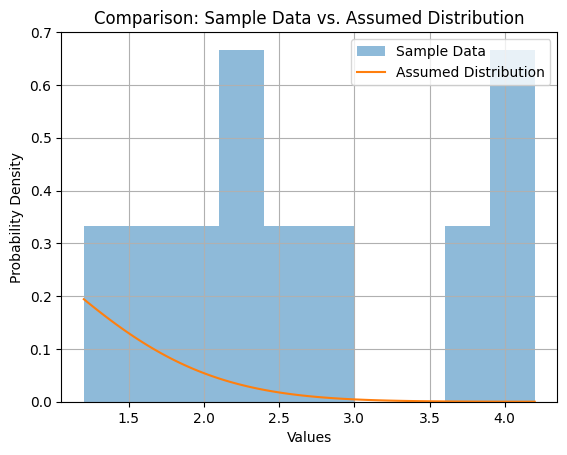

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Assumed distribution
assumed_distribution = stats.norm

# Plotting the histogram of the sample data
plt.hist(sample_data, bins=10, density=True, alpha=0.5, label='Sample Data')

# Comparing with the assumed distribution
x = np.linspace(min(sample_data), max(sample_data), 100)
y = assumed_distribution.pdf(x)
plt.plot(x, y, label='Assumed Distribution')

# Perform the AD test
ad_stat, critical_values, significance_levels = stats.anderson(sample_data, 'norm')

# Print the test results
print(f"AD Test Statistic: {ad_stat}")
print(f"AD Test Critical Values: {critical_values}")

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Comparison: Sample Data vs. Assumed Distribution')
plt.legend()
plt.grid(True)
plt.show()

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
2.326962268005428

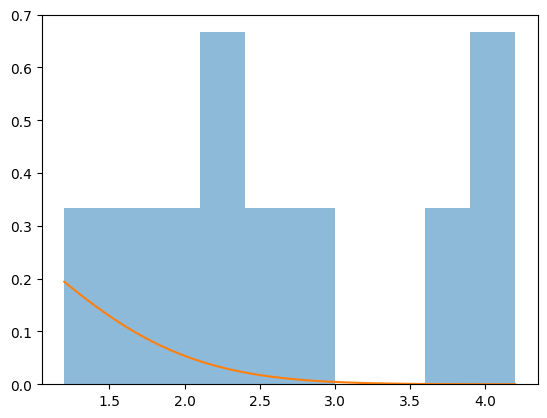

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Assumed distribution
assumed_distribution = stats.norm

# Plotting the histogram of the sample data
plt.hist(sample_data, bins=10, density=True, alpha=0.5, label='Sample Data')

# Comparing with the assumed distribution
x = np.linspace(min(sample_data), max(sample_data), 100)
y = assumed_distribution.pdf(x)
plt.plot(x, y, label='Assumed Distribution')

# Define the observed and expected frequencies
observed, bin_edges = np.histogram(sample_data, bins='auto')
expected = len(sample_data) * assumed_distribution.pdf(bin_edges[:-1])

# Perform the χ² test
chi2_stat, p_value_chi2 = stats.chisquare(observed, expected)

# Print the test results
print(f"Chi-Square Test Statistic: {chi2_stat}")
print(f"Chi-Square Test p-value: {p_value_chi2}")

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Comparison: Sample Data vs. Assumed Distribution')
plt.legend()
plt.grid(True)
plt.show()

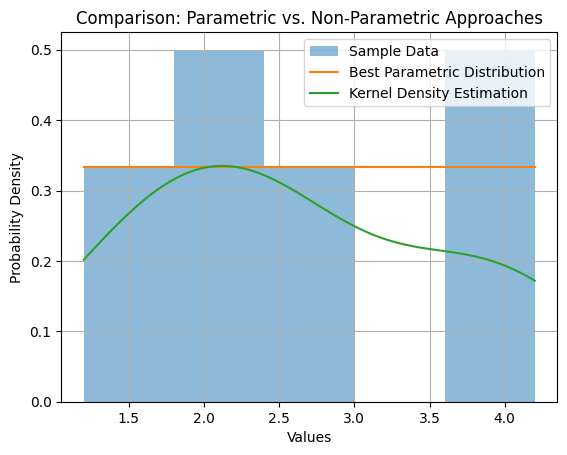

Best Parametric Distribution: uniform
Parameters: (1.2, 3.0)


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Parametric approach
candidate_distributions = [
    stats.norm,      # Normal distribution
    stats.expon,     # Exponential distribution
    stats.gamma,     # Gamma distribution
    stats.beta,      # Beta distribution
    stats.uniform    # Uniform distribution
]

best_parametric_dist = None
best_parametric_params = ()
best_parametric_sse = np.inf

for distribution in candidate_distributions:
    # Fit the distribution to the data
    params = distribution.fit(sample_data)
    # Generate PDF using the fitted parameters
    pdf = distribution.pdf(sample_data, *params)
    # Calculate the sum of squared errors (SSE)
    sse = np.sum((pdf - sample_data) ** 2)
    # Check if this distribution provides a better fit
    if sse < best_parametric_sse:
        best_parametric_dist = distribution
        best_parametric_params = params
        best_parametric_sse = sse

# Non-parametric approach (Kernel Density Estimation)
kde = stats.gaussian_kde(sample_data)

# Plotting histograms and KDE curve
plt.hist(sample_data, bins='auto', density=True, alpha=0.5, label='Sample Data')

x = np.linspace(min(sample_data), max(sample_data), 100)
plt.plot(x, best_parametric_dist.pdf(x, *best_parametric_params), label='Best Parametric Distribution')
plt.plot(x, kde.evaluate(x), label='Kernel Density Estimation')

plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Comparison: Parametric vs. Non-Parametric Approaches')
plt.legend()
plt.grid(True)
plt.show()

# Print the best-fit parametric distribution and its parameters
print(f"Best Parametric Distribution: {best_parametric_dist.name}")
print(f"Parameters: {best_parametric_params}")

TypeError: 'module' object is not callable

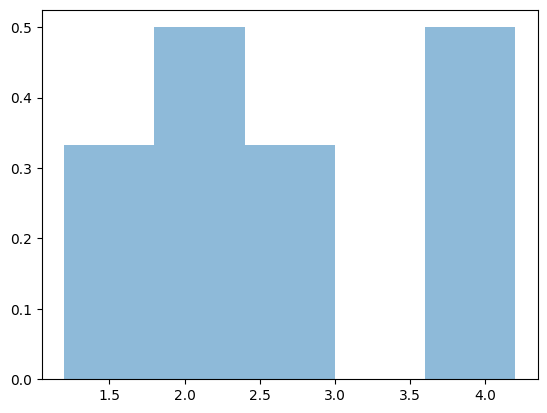

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Define candidate kernels and bandwidths
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential']
bandwidths = [0.1, 0.2, 0.3, 0.4]

# Calculate histograms for the sample data
hist, bin_edges = np.histogram(sample_data, bins='auto', density=True)

# Plot the histograms
plt.hist(sample_data, bins='auto', density=True, alpha=0.5, label='Sample Data')

# Iterate over candidate kernels and bandwidths
best_kde = None
best_kernel = None
best_bandwidth = None
best_sse = np.inf

for kernel in kernels:
    for bandwidth in bandwidths:
        # Perform kernel density estimation
        # kde = stats.gaussian_kde(sample_data, kernel=kernel, bw_method=bandwidth)
        kde = stats.kde(sample_data, kernel=kernel, bw_method=bandwidth)

        # Generate PDF using the KDE
        pdf = kde.evaluate(bin_edges[:-1])

        # Calculate the sum of squared errors (SSE)
        sse = np.sum((hist - pdf) ** 2)

        # Check if this kernel and bandwidth provide a better fit
        if sse < best_sse:
            best_kde = kde
            best_kernel = kernel
            best_bandwidth = bandwidth
            best_sse = sse

# Plot the best-fit KDE
x = np.linspace(min(sample_data), max(sample_data), 100)
plt.plot(x, best_kde.evaluate(x), label=f"Best KDE ({best_kernel}, Bandwidth={best_bandwidth})")

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Best-fit Probability Density Function for Sample Data using KDE')
plt.legend()
plt.grid(True)
plt.show()

# Print the best-fit KDE parameters
print(f"Best KDE Kernel: {best_kernel}")
print(f"Best KDE Bandwidth: {best_bandwidth}")

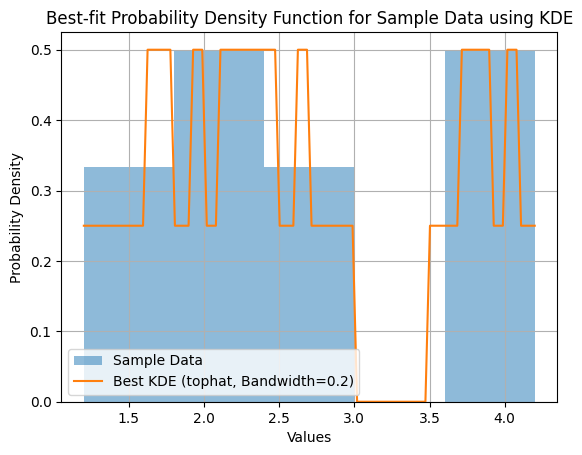

Best KDE Kernel: tophat
Best KDE Bandwidth: 0.2


In [88]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Define candidate kernels and bandwidths
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential']
bandwidths = [0.1, 0.2, 0.3, 0.4]

# Calculate histograms for the sample data
hist, bin_edges = np.histogram(sample_data, bins='auto', density=True)

# Plot the histograms
plt.hist(sample_data, bins='auto', density=True, alpha=0.5, label='Sample Data')

# Iterate over candidate kernels and bandwidths
best_kde = None
best_kernel = None
best_bandwidth = None
best_sse = np.inf

for kernel in kernels:
    for bandwidth in bandwidths:
        # Perform kernel density estimation
        kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(sample_data.reshape(-1, 1))

        # Generate PDF using the KDE
        log_dens = kde.score_samples(bin_edges[:-1].reshape(-1, 1))
        pdf = np.exp(log_dens)

        # Calculate the sum of squared errors (SSE)
        sse = np.sum((hist - pdf) ** 2)

        # Check if this kernel and bandwidth provide a better fit
        if sse < best_sse:
            best_kde = kde
            best_kernel = kernel
            best_bandwidth = bandwidth
            best_sse = sse

# Plot the best-fit KDE
x = np.linspace(min(sample_data), max(sample_data), 100).reshape(-1, 1)
log_dens = best_kde.score_samples(x)
pdf = np.exp(log_dens)
plt.plot(x, pdf, label=f"Best KDE ({best_kernel}, Bandwidth={best_bandwidth})")

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Best-fit Probability Density Function for Sample Data using KDE')
plt.legend()
plt.grid(True)
plt.show()

# Print the best-fit KDE parameters
print(f"Best KDE Kernel: {best_kernel}")
print(f"Best KDE Bandwidth: {best_bandwidth}")

TypeError: gaussian_kde.__init__() got an unexpected keyword argument 'kernel'

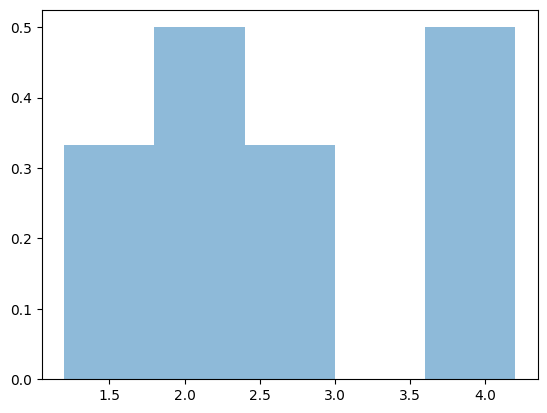

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Define candidate kernels
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential']

# Calculate histograms for the sample data
hist, bin_edges = np.histogram(sample_data, bins='auto', density=True)

# Plot the histograms
plt.hist(sample_data, bins='auto', density=True, alpha=0.5, label='Sample Data')

# Iterate over candidate kernels
best_kde = None
best_kernel = None
best_sse = np.inf

for kernel in kernels:
    # Perform kernel density estimation
    kde = stats.gaussian_kde(sample_data, kernel=kernel)

    # Generate PDF using the KDE
    pdf = kde.evaluate(bin_edges[:-1])

    # Calculate the sum of squared errors (SSE)
    sse = np.sum((hist - pdf) ** 2)

    # Check if this kernel provides a better fit
    if sse < best_sse:
        best_kde = kde
        best_kernel = kernel
        best_sse = sse

# Plot the best-fit KDE
x = np.linspace(min(sample_data), max(sample_data), 100)
plt.plot(x, best_kde.evaluate(x), label=f"Best KDE ({best_kernel})")

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Best-fit Probability Density Function for Sample Data using KDE')
plt.legend()
plt.grid(True)
plt.show()

# Print the best-fit KDE kernel
print(f"Best KDE Kernel: {best_kernel}")

ValueError: `bw_method` should be 'scott', 'silverman', a scalar or a callable.

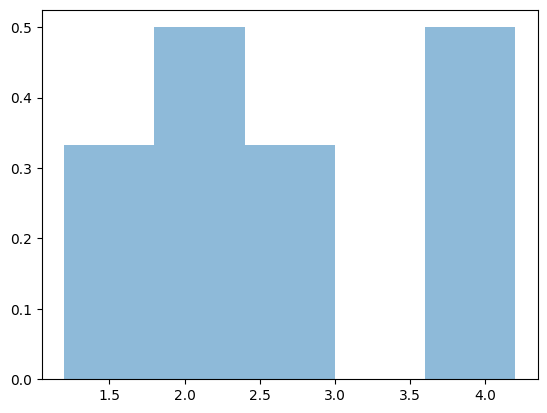

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Define candidate kernels
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential']

# Calculate histograms for the sample data
hist, bin_edges = np.histogram(sample_data, bins='auto', density=True)

# Plot the histograms
plt.hist(sample_data, bins='auto', density=True, alpha=0.5, label='Sample Data')

# Iterate over candidate kernels
best_kde = None
best_kernel = None
best_sse = np.inf

for kernel in kernels:
    # Perform kernel density estimation
    kde = stats.gaussian_kde(sample_data)

    # Set the kernel
    kde.set_bandwidth(bw_method=kernel)

    # Generate PDF using the KDE
    pdf = kde.evaluate(bin_edges[:-1])

    # Calculate the sum of squared errors (SSE)
    sse = np.sum((hist - pdf) ** 2)

    # Check if this kernel provides a better fit
    if sse < best_sse:
        best_kde = kde
        best_kernel = kernel
        best_sse = sse

# Plot the best-fit KDE
x = np.linspace(min(sample_data), max(sample_data), 100)
plt.plot(x, best_kde.evaluate(x), label=f"Best KDE ({best_kernel})")

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Best-fit Probability Density Function for Sample Data using KDE')
plt.legend()
plt.grid(True)
plt.show()

# Print the best-fit KDE kernel
print(f"Best KDE Kernel: {best_kernel}")


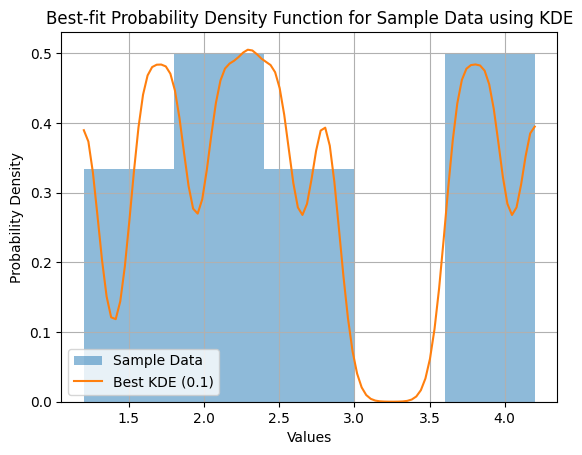

Best KDE Kernel: 0.1


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Example sample data
sample_data = np.array([1.2, 2.5, 1.8, 3.7, 2.1, 4.2, 1.6, 3.9, 2.8, 2.3])

# Define candidate kernels
kernels = ['scott', 'silverman', 0.1, 0.2, 0.3]

# Calculate histograms for the sample data
hist, bin_edges = np.histogram(sample_data, bins='auto', density=True)

# Plot the histograms
plt.hist(sample_data, bins='auto', density=True, alpha=0.5, label='Sample Data')

# Iterate over candidate kernels
best_kde = None
best_kernel = None
best_sse = np.inf

for kernel in kernels:
    # Perform kernel density estimation
    kde = stats.gaussian_kde(sample_data, bw_method=kernel)

    # Generate PDF using the KDE
    pdf = kde.evaluate(bin_edges[:-1])

    # Calculate the sum of squared errors (SSE)
    sse = np.sum((hist - pdf) ** 2)

    # Check if this kernel provides a better fit
    if sse < best_sse:
        best_kde = kde
        best_kernel = kernel
        best_sse = sse

# Plot the best-fit KDE
x = np.linspace(min(sample_data), max(sample_data), 100)
plt.plot(x, best_kde.evaluate(x), label=f"Best KDE ({best_kernel})")

# Customize the plot
plt.xlabel('Values')
plt.ylabel('Probability Density')
plt.title('Best-fit Probability Density Function for Sample Data using KDE')
plt.legend()
plt.grid(True)
plt.show()

# Print the best-fit KDE kernel
print(f"Best KDE Kernel: {best_kernel}")